## 패키지 준비

In [ ]:
%pip install matplotlib
%pip install scikit-learn

## 샘플 데이터 준비

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
                
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 샘플 데이터를 넘파이 데이터로 변환

In [8]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))     ## Fish Data; 2D Array
fish_target = np.concatenate((np.ones(35), np.zeros(14)))   ## Answer Book

print(fish_data)
print(fish_target)

print(fish_data.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
(49, 2)


## 훈련 세트, 테스트 세트 나누기 (무작위; 타깃 데이터 = fish_target)

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)
print(train_input)

## K-NN 모델 훈련

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

## 샘플 데이터 주입 및 산점도 산출

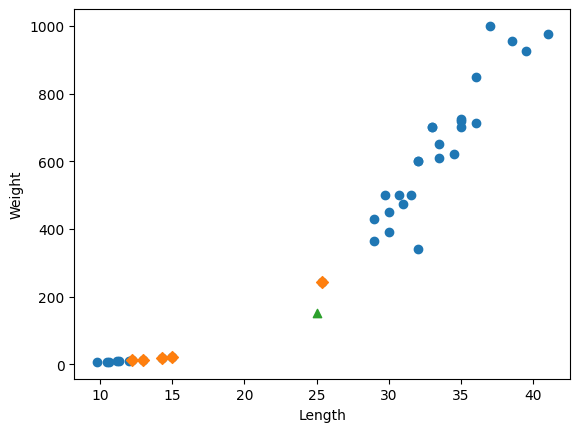

[29.7 12.2 33.  11.3 39.5 29.  36.  36.  31.  35.  37.  11.2 34.5 12.
 29.  33.  30.7 38.5 33.5 14.3 31.5 25.4  9.8 32.  10.5 33.5 10.6 35.
 32.  35.  13.  30.  32.  15.  30.  41. ]


In [12]:
import matplotlib.pyplot as plt

distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.scatter(25, 150, marker = '^')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

## X축 범위 수정 후 산점도 산출 (X 축 범위: 0 ~ 1000)

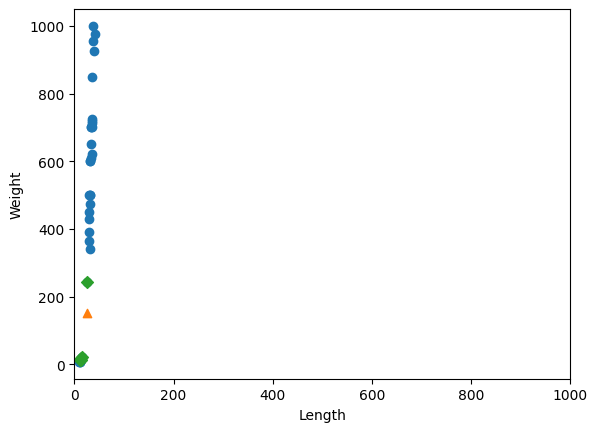

In [9]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000))

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [14]:
print(train_input[:, 0])
print(train_input[:, 1])

[29.7 12.2 33.  11.3 39.5 29.  36.  36.  31.  35.  37.  11.2 34.5 12.
 29.  33.  30.7 38.5 33.5 14.3 31.5 25.4  9.8 32.  10.5 33.5 10.6 35.
 32.  35.  13.  30.  32.  15.  30.  41. ]
[ 500.    12.2  700.     8.7  925.   430.   714.   850.   475.   720.
 1000.     9.8  620.     9.8  363.   700.   500.   955.   650.    19.7
  500.   242.     6.7  600.     7.5  610.     7.   700.   600.   725.
   12.2  450.   340.    19.9  390.   975. ]


## 표준 편차 계산 (행을 따라 열의 통계 값 계산)

In [11]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

## 표준 점수 계산 ((원본 데이터 - 평균) / 표준 편차)

In [ ]:
train_scaled = ((train_input - mean) / std)

## 표준 점수를 적용하여 산점도 산출

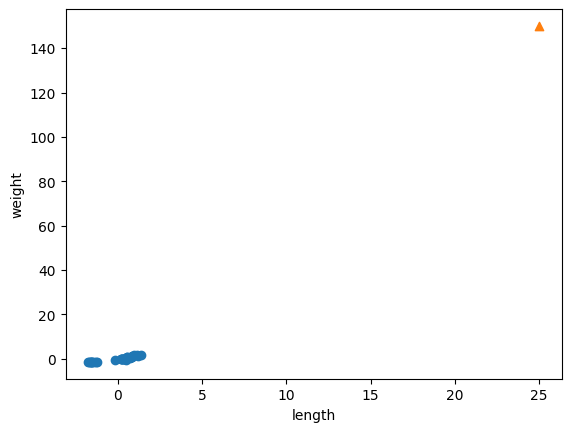

In [12]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 테스트용 샘플 데이터 적용 (수정된 비율 적용)

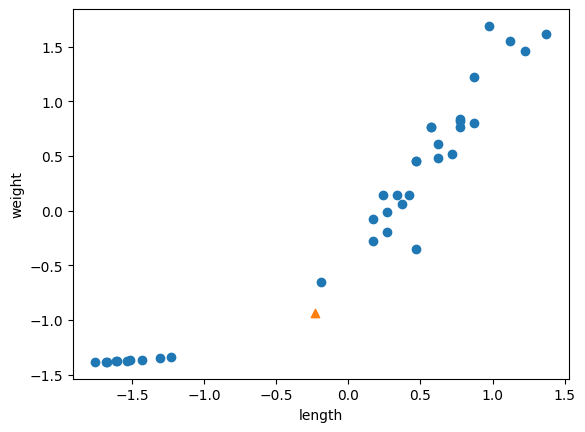

In [13]:
new = (([25, 150] - mean) / std)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 조정된 비율을 적용하여 K-NN 모델 훈련

In [17]:
kn.fit(train_scaled, train_target)

test_scaled = ((test_input - mean) / std)
print(kn.score(test_scaled, test_target))

distances, indexes = kn.kneighbors([new])

1.0


## 비율이 수정된 모델의 산점도 산출

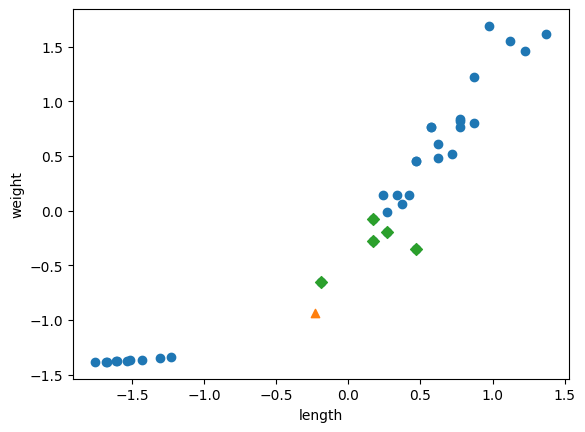

In [16]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()